# Regular Tasks for Machine Learning and Statistics 2022
<hr style="border-top: 1px solid #001a79;" />
<h1 style="color: #001a79;">Models Exercises</h1>

<hr style="border-top: 1px solid #001a79;" /> 

<h3 style="color: #001a79;">Exercise 2.1</h3>

Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

In [1]:
#Import matplotlib.
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Return evenly spaced values within a given interval
t = np.arange(0.0, 21.0, 1.0)
#np.random - Draw random samples from a normal distribution.
r = 5 * t + 10.0 + np.random.normal(0.0, 5.0, t.size)

In [3]:
# looking at what is contained in t
t 

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [4]:
# looking ayt what is contained in r
r

array([ 18.93333489,  10.1059154 ,  17.40220278,  20.93176048,
        29.76788708,  33.03506922,  41.82910545,  44.08090523,
        45.00910683,  63.11520792,  64.40813742,  67.4718115 ,
        64.39623537,  76.56456667,  81.26644882,  95.6712072 ,
        88.64722481,  89.34684799, 104.99985266, 103.91677211,
       105.99903561])

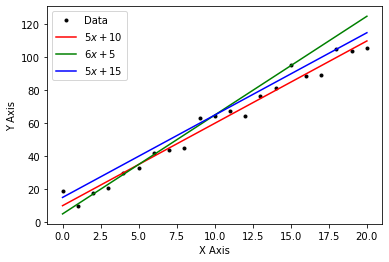

In [5]:
# Plot t versus r with black dots.
plt.plot(t, r, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Show the plot.
plt.show()

In [6]:
# Calculate the cost of the lines above for the data above.
# Code adapted from: https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb
cost = lambda m,c: np.sum([(r[i] - m * t[i] - c)**2 for i in range(t.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  5.00 and c = 10.00:   476.76
Cost with m =  6.00 and c =  5.00:  1683.92
Cost with m =  5.00 and c = 15.00:   932.78


When using absolute values you have to draw many different regression lines and measure the error distances for each observation to the regression line but you can never be sure that you find the best fitting regression line. 
A simplier way to find the best fitting regression line is to use the squared values.

[*Bradthiessen*]

<h3 style="color: #001a79;">Exercise 2.2</h3>

Fit a straight line to the following data points, using all three methods used above.

Do you think a straight line is a good model for these points?

x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]

y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]


In [7]:
# Optimization.
import scipy.optimize as so
import numpy as np
import matplotlib.pyplot as plt

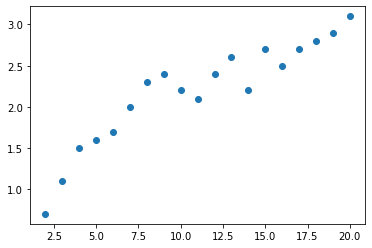

In [8]:
#Plotting the provided points.
x = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
y = np.array([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])
#converted to np arrays
plt.plot(x, y, "o")

## Best Fit Line

Below I will plot the best fit line to the data. 

In [9]:
np.polyfit(x, y, 1)

array([0.10315789, 1.04947368])

In [10]:
m_b, c_b = np.polyfit(x, y, 1)
m_b, c_b


(0.10315789473684209, 1.0494736842105263)

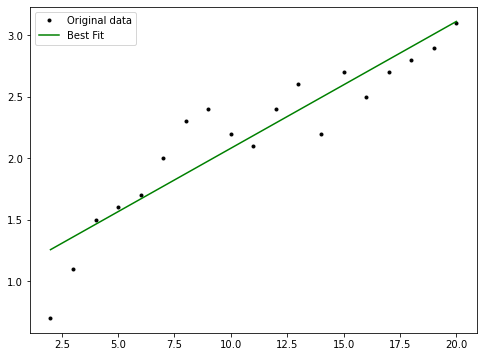

In [11]:
# Plot the best fit line 
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_b * x + c_b, 'g-', label='Best Fit')

ax.legend()

# Show the plot.
plt.show()

## Optimization

In [12]:
# We are going to use minimize function in scipy.optimize.
# So - what do we need? First we need a function to minimze.

# x and y have fixed values in this scenario as above.

# The function to be minimized - the cost function.
# It must take a single argument! But our cost function takes 2: m and c.
# So, we'll put them in a list called MC. e.g. MC = (5, 10)
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

In [13]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (2.0, 2.0))
# Show the results.
result

      fun: 1.0395789473691037
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([2.98023224e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [14]:
# Extract the optimized m and c.
m_o, c_o = result.x
# Print them.
m_o, c_o

(0.10315786014998399, 1.04947405671058)

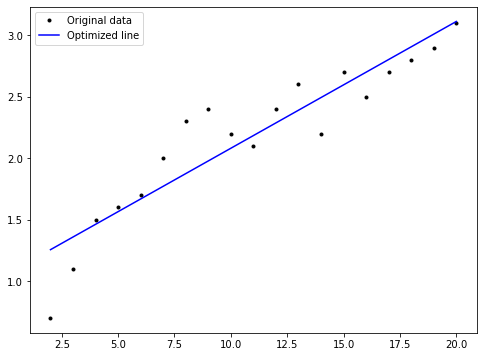

In [15]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')

ax.legend()

# Show the plot.
plt.show()

##  Curve Line

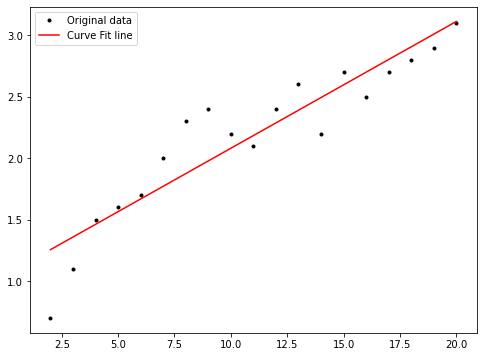

In [16]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Create the model function.
def f(x, m, c):
    return m * x + c


# Run curve_fit.
result = so.curve_fit(f, x, y)

# Look at the result.
result

# Pull out the parameters.
m_f, c_f = result[0]
# Print values.
m_f, c_f

# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')

ax.legend()

# Show the plot.
plt.show()

## All 3 Together 

Below I plot all 3 methods together to see the outcome. 

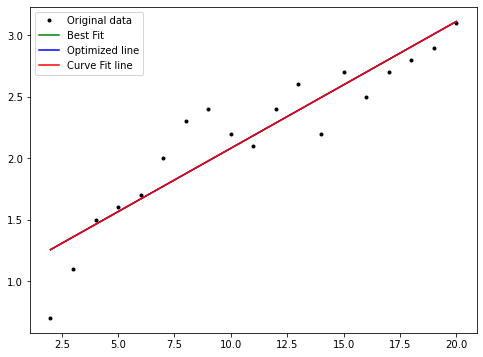

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_b * x + c_b, 'g-', label='Best Fit')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
ax.legend()

# Show the plot.
plt.show()

The result of the plotting is that there is very little difference between the 3 lines. From this it shows that plotting straight lines might not be the best method for comparing this type of data set. we can see that there are data points that are well away for the line in  both directions on the X and Y axis 

## **References**
I used ATU video Lectures by Ian McLoughlin and class notes to complete this work.
In addition I searched online using the following websites which were used for the relevant sections of this assessment as detailed.
- **Exercise 2.1**

[Git Hub](https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb)

[Bradthiessen](https://www.bradthiessen.com/html5/docs/ols.pdf)


- **Exercise 2.2**

[Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)

**Laura Brogan 06/01/23**